Mean: 0.00288
Standard Deviation: 0.01626
Skewness: -0.24060
Excess Kurtosis: 1.47266

Shapiro-Wilk Test: Statistics=0.95693, p-value=0.00081
Conclusion: Data is not normally distributed (reject H0)


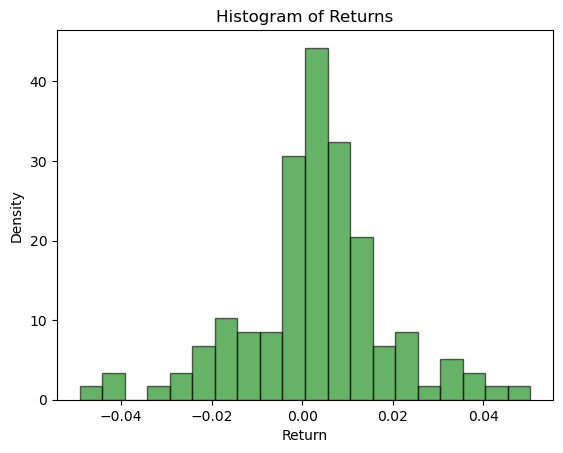

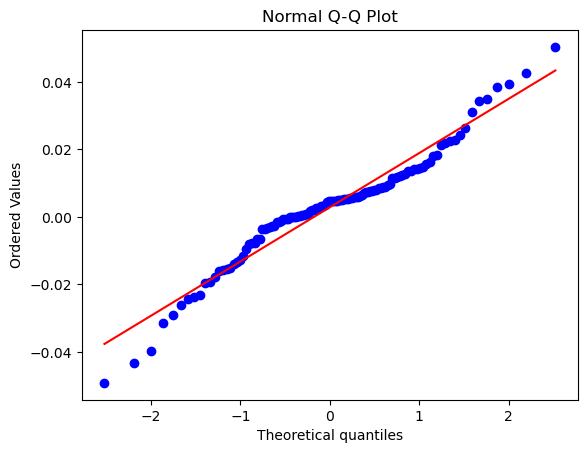

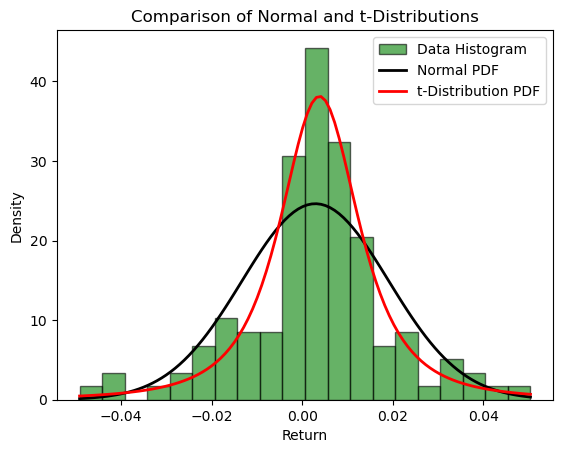

Normal Distribution: AIC = -634.22, BIC = -628.67
t-Distribution: AIC = -647.00, BIC = -638.69

Based on AIC, the t-distribution provides a better fit.
Based on BIC, the t-distribution provides a better fit.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

# Paste your data as a multiline string
data_str = '''
0.0094
-0.0005
0.0141
0.0033
0.0018
0.0000
-0.0026
-0.0127
0.0088
-0.0161
-0.0005
0.0157
-0.0013
-0.0077
0.0007
0.0048
0.0219
0.0047
0.0027
0.0147
0.0145
0.0000
0.0008
-0.0117
-0.0139
0.0064
0.0047
0.0114
0.0022
0.0086
0.0085
0.0000
0.0078
0.0078
0.0008
0.0058
0.0045
0.0055
0.0032
-0.0135
0.0026
-0.0033
0.0059
0.0004
0.0059
0.0052
-0.0030
-0.0195
0.0073
-0.0015
0.0242
0.0053
0.0185
0.0071
0.0006
0.0227
0.0050
0.0163
0.0003
0.0050
0.0049
0.0048
0.0136
-0.0037
-0.0396
0.0351
0.0136
0.0118
0.0212
0.0047
-0.0035
-0.0065
0.0311
0.0121
-0.0064
-0.0076
-0.0015
0.0124
0.0052
0.0079
0.0115
0.0028
-0.0158
0.0081
-0.0006
0.0034
-0.0242
-0.0151
-0.0179
-0.0432
0.0020
-0.0291
0.0345
-0.0314
-0.0492
0.0057
0.0426
-0.0193
0.0384
-0.0236
0.0263
0.0061
-0.0080
0.0088
0.0074
-0.0094
-0.0260
-0.0154
0.0504
0.0395
-0.0026
0.0000
0.0128
-0.0230
0.0181
0.0098
0.0224
0.0142
'''

# Convert the data to a numpy array
data = np.fromstring(data_str, sep='\n')

# Remove any NaN or empty values
data = data[~np.isnan(data)]

# Compute basic statistics
mean = np.mean(data)
std_dev = np.std(data, ddof=1)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)  # Excess kurtosis (subtract 3 for Pearson's kurtosis)

print(f"Mean: {mean:.5f}")
print(f"Standard Deviation: {std_dev:.5f}")
print(f"Skewness: {skewness:.5f}")
print(f"Excess Kurtosis: {kurtosis:.5f}")

# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(data)
print(f"\nShapiro-Wilk Test: Statistics={stat:.5f}, p-value={p_value:.5f}")
if p_value > 0.05:
    print("Conclusion: Data is normally distributed (fail to reject H0)")
else:
    print("Conclusion: Data is not normally distributed (reject H0)")

# Plot histogram of the data
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Histogram of Returns')
plt.xlabel('Return')
plt.ylabel('Density')
plt.show()

# Q-Q plot to assess normality
stats.probplot(data, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

# Fit a normal distribution
mu_norm, std_norm = stats.norm.fit(data)

# Fit a t-distribution
df_t, loc_t, scale_t = stats.t.fit(data)

# Define the range for plotting PDFs
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)

# Plot histogram and PDFs of both distributions
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', edgecolor='black', label='Data Histogram')

# Normal distribution PDF
p_norm = stats.norm.pdf(x, mu_norm, std_norm)
plt.plot(x, p_norm, 'k', linewidth=2, label=f'Normal PDF')

# t-distribution PDF
p_t = stats.t.pdf(x, df_t, loc_t, scale_t)
plt.plot(x, p_t, 'r', linewidth=2, label=f't-Distribution PDF')

plt.title('Comparison of Normal and t-Distributions')
plt.xlabel('Return')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate AIC and BIC for model comparison
n = len(data)

# For normal distribution
nll_norm = -np.sum(stats.norm.logpdf(data, mu_norm, std_norm))
k_norm = 2  # Number of parameters: mu and std
AIC_norm = 2 * k_norm + 2 * nll_norm
BIC_norm = k_norm * np.log(n) + 2 * nll_norm

# For t-distribution
nll_t = -np.sum(stats.t.logpdf(data, df_t, loc_t, scale_t))
k_t = 3  # Number of parameters: df, loc, scale
AIC_t = 2 * k_t + 2 * nll_t
BIC_t = k_t * np.log(n) + 2 * nll_t

print(f"Normal Distribution: AIC = {AIC_norm:.2f}, BIC = {BIC_norm:.2f}")
print(f"t-Distribution: AIC = {AIC_t:.2f}, BIC = {BIC_t:.2f}")

if AIC_t < AIC_norm:
    print("\nBased on AIC, the t-distribution provides a better fit.")
else:
    print("\nBased on AIC, the normal distribution provides a better fit.")

if BIC_t < BIC_norm:
    print("Based on BIC, the t-distribution provides a better fit.")
else:
    print("Based on BIC, the normal distribution provides a better fit.")


In [2]:
# Number of bootstrap samples
n_bootstrap = 1000

# Generate bootstrap samples using the t-distribution
bootstrap_samples = stats.t.rvs(df=df_t, loc=loc_t, scale=scale_t, size=(n_bootstrap, n))

# Compute the statistic of interest (e.g., mean) for each bootstrap sample
bootstrap_means = np.mean(bootstrap_samples, axis=1)

# Calculate confidence intervals, etc.
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print(f"95% Confidence Interval for the Mean: {confidence_interval}")

95% Confidence Interval for the Mean: [-0.00053287  0.00805489]


Mean: 0.00288
Standard Deviation: 0.01626
Skewness: -0.24060
Excess Kurtosis: 1.47266

Shapiro-Wilk Test: Statistics=0.95693, p-value=0.00081
Conclusion: Data is not normally distributed (reject H0)


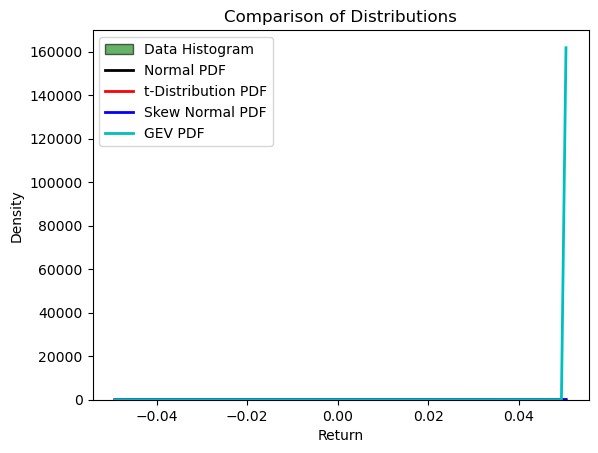

Normal Distribution: AIC = -634.22, BIC = -628.67
t-Distribution: AIC = -647.00, BIC = -638.69
Skew Normal Distribution: AIC = -633.48, BIC = -625.17
GEV Distribution: AIC = -431.89, BIC = -423.58

Based on AIC, the t-Distribution provides the best fit.
Based on BIC, the t-Distribution provides the best fit.


In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.optimize import minimize
from scipy.special import gamma

# Paste your data as a multiline string
data_str = '''
0.0094
-0.0005
0.0141
0.0033
0.0018
0.0000
-0.0026
-0.0127
0.0088
-0.0161
-0.0005
0.0157
-0.0013
-0.0077
0.0007
0.0048
0.0219
0.0047
0.0027
0.0147
0.0145
0.0000
0.0008
-0.0117
-0.0139
0.0064
0.0047
0.0114
0.0022
0.0086
0.0085
0.0000
0.0078
0.0078
0.0008
0.0058
0.0045
0.0055
0.0032
-0.0135
0.0026
-0.0033
0.0059
0.0004
0.0059
0.0052
-0.0030
-0.0195
0.0073
-0.0015
0.0242
0.0053
0.0185
0.0071
0.0006
0.0227
0.0050
0.0163
0.0003
0.0050
0.0049
0.0048
0.0136
-0.0037
-0.0396
0.0351
0.0136
0.0118
0.0212
0.0047
-0.0035
-0.0065
0.0311
0.0121
-0.0064
-0.0076
-0.0015
0.0124
0.0052
0.0079
0.0115
0.0028
-0.0158
0.0081
-0.0006
0.0034
-0.0242
-0.0151
-0.0179
-0.0432
0.0020
-0.0291
0.0345
-0.0314
-0.0492
0.0057
0.0426
-0.0193
0.0384
-0.0236
0.0263
0.0061
-0.0080
0.0088
0.0074
-0.0094
-0.0260
-0.0154
0.0504
0.0395
-0.0026
0.0000
0.0128
-0.0230
0.0181
0.0098
0.0224
0.0142
'''

# Convert the data to a numpy array
data = np.fromstring(data_str, sep='\n')

# Remove any NaN or empty values
data = data[~np.isnan(data)]

# Compute basic statistics
mean = np.mean(data)
std_dev = np.std(data, ddof=1)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)  # Excess kurtosis

print(f"Mean: {mean:.5f}")
print(f"Standard Deviation: {std_dev:.5f}")
print(f"Skewness: {skewness:.5f}")
print(f"Excess Kurtosis: {kurtosis:.5f}")

# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(data)
print(f"\nShapiro-Wilk Test: Statistics={stat:.5f}, p-value={p_value:.5f}")
if p_value > 0.05:
    print("Conclusion: Data is normally distributed (fail to reject H0)")
else:
    print("Conclusion: Data is not normally distributed (reject H0)")

# Define the range for plotting PDFs
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)

# Plot histogram of the data
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', edgecolor='black', label='Data Histogram')

# Fit a normal distribution
mu_norm, std_norm = stats.norm.fit(data)
p_norm = stats.norm.pdf(x, mu_norm, std_norm)
plt.plot(x, p_norm, 'k', linewidth=2, label='Normal PDF')

# Fit a t-distribution
df_t, loc_t, scale_t = stats.t.fit(data)
p_t = stats.t.pdf(x, df_t, loc_t, scale_t)
plt.plot(x, p_t, 'r', linewidth=2, label='t-Distribution PDF')

# Fit a skew normal distribution
a_skewnorm, loc_skewnorm, scale_skewnorm = stats.skewnorm.fit(data)
p_skewnorm = stats.skewnorm.pdf(x, a_skewnorm, loc_skewnorm, scale_skewnorm)
plt.plot(x, p_skewnorm, 'b', linewidth=2, label='Skew Normal PDF')

# Fit a generalized extreme value distribution (GEV)
c_gev, loc_gev, scale_gev = stats.genextreme.fit(data)
p_gev = stats.genextreme.pdf(x, c_gev, loc_gev, scale_gev)
plt.plot(x, p_gev, 'c', linewidth=2, label='GEV PDF')

plt.title('Comparison of Distributions')
plt.xlabel('Return')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate AIC and BIC for model comparison
def calculate_aic_bic(nll, k, n):
    aic = 2 * k + 2 * nll
    bic = k * np.log(n) + 2 * nll
    return aic, bic

n = len(data)

# For normal distribution
nll_norm = -np.sum(stats.norm.logpdf(data, mu_norm, std_norm))
k_norm = 2  # mu and std
AIC_norm, BIC_norm = calculate_aic_bic(nll_norm, k_norm, n)

# For t-distribution
nll_t = -np.sum(stats.t.logpdf(data, df_t, loc_t, scale_t))
k_t = 3  # df, loc, scale
AIC_t, BIC_t = calculate_aic_bic(nll_t, k_t, n)

# For skew normal distribution
nll_skewnorm = -np.sum(stats.skewnorm.logpdf(data, a_skewnorm, loc_skewnorm, scale_skewnorm))
k_skewnorm = 3  # shape (a), loc, scale
AIC_skewnorm, BIC_skewnorm = calculate_aic_bic(nll_skewnorm, k_skewnorm, n)

# For GEV distribution
nll_gev = -np.sum(stats.genextreme.logpdf(data, c_gev, loc_gev, scale_gev))
k_gev = 3  # shape (c), loc, scale
AIC_gev, BIC_gev = calculate_aic_bic(nll_gev, k_gev, n)

# Summarize the results
print(f"Normal Distribution: AIC = {AIC_norm:.2f}, BIC = {BIC_norm:.2f}")
print(f"t-Distribution: AIC = {AIC_t:.2f}, BIC = {BIC_t:.2f}")
print(f"Skew Normal Distribution: AIC = {AIC_skewnorm:.2f}, BIC = {BIC_skewnorm:.2f}")
print(f"GEV Distribution: AIC = {AIC_gev:.2f}, BIC = {BIC_gev:.2f}")

# Determine the best-fitting distribution
aic_values = {'Normal': AIC_norm, 't-Distribution': AIC_t, 'Skew Normal': AIC_skewnorm, 'GEV': AIC_gev}
bic_values = {'Normal': BIC_norm, 't-Distribution': BIC_t, 'Skew Normal': BIC_skewnorm, 'GEV': BIC_gev}

best_aic = min(aic_values, key=aic_values.get)
best_bic = min(bic_values, key=bic_values.get)

print(f"\nBased on AIC, the {best_aic} provides the best fit.")
print(f"Based on BIC, the {best_bic} provides the best fit.")


Mean: 0.00288
Standard Deviation: 0.01626
Skewness: -0.24060
Excess Kurtosis: 1.47266

Shapiro-Wilk Test: Statistics=0.95693, p-value=0.00081
Conclusion: Data is not normally distributed (reject H0)


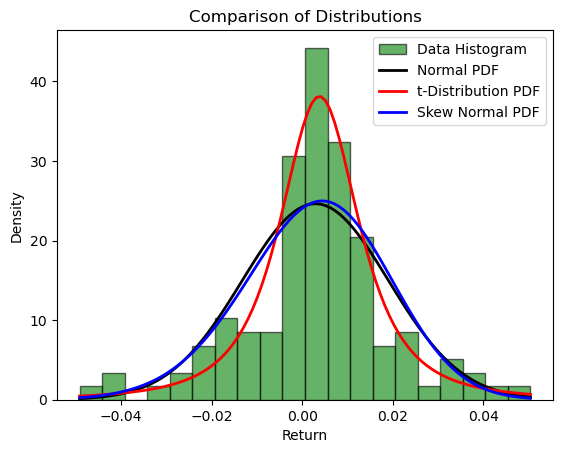

Normal Distribution: AIC = -634.22, BIC = -628.67
t-Distribution: AIC = -647.00, BIC = -638.69
Skew Normal Distribution: AIC = -633.48, BIC = -625.17

Based on AIC, the t-Distribution provides the best fit.
Based on BIC, the t-Distribution provides the best fit.


In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.optimize import minimize

# Paste your data as a multiline string
data_str = '''
0.0094
-0.0005
0.0141
0.0033
0.0018
0.0000
-0.0026
-0.0127
0.0088
-0.0161
-0.0005
0.0157
-0.0013
-0.0077
0.0007
0.0048
0.0219
0.0047
0.0027
0.0147
0.0145
0.0000
0.0008
-0.0117
-0.0139
0.0064
0.0047
0.0114
0.0022
0.0086
0.0085
0.0000
0.0078
0.0078
0.0008
0.0058
0.0045
0.0055
0.0032
-0.0135
0.0026
-0.0033
0.0059
0.0004
0.0059
0.0052
-0.0030
-0.0195
0.0073
-0.0015
0.0242
0.0053
0.0185
0.0071
0.0006
0.0227
0.0050
0.0163
0.0003
0.0050
0.0049
0.0048
0.0136
-0.0037
-0.0396
0.0351
0.0136
0.0118
0.0212
0.0047
-0.0035
-0.0065
0.0311
0.0121
-0.0064
-0.0076
-0.0015
0.0124
0.0052
0.0079
0.0115
0.0028
-0.0158
0.0081
-0.0006
0.0034
-0.0242
-0.0151
-0.0179
-0.0432
0.0020
-0.0291
0.0345
-0.0314
-0.0492
0.0057
0.0426
-0.0193
0.0384
-0.0236
0.0263
0.0061
-0.0080
0.0088
0.0074
-0.0094
-0.0260
-0.0154
0.0504
0.0395
-0.0026
0.0000
0.0128
-0.0230
0.0181
0.0098
0.0224
0.0142
'''

# Convert the data to a numpy array
data = np.fromstring(data_str, sep='\n')
data = data[~np.isnan(data)]

# Compute basic statistics
mean = np.mean(data)
std_dev = np.std(data, ddof=1)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)  # Excess kurtosis

print(f"Mean: {mean:.5f}")
print(f"Standard Deviation: {std_dev:.5f}")
print(f"Skewness: {skewness:.5f}")
print(f"Excess Kurtosis: {kurtosis:.5f}")

# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(data)
print(f"\nShapiro-Wilk Test: Statistics={stat:.5f}, p-value={p_value:.5f}")
if p_value > 0.05:
    print("Conclusion: Data is normally distributed (fail to reject H0)")
else:
    print("Conclusion: Data is not normally distributed (reject H0)")

# Define the range for plotting PDFs
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)

# Plot histogram of the data
plt.hist(data, bins=20, density=True, alpha=0.6, color='g', edgecolor='black', label='Data Histogram')

# Fit a normal distribution
mu_norm, std_norm = stats.norm.fit(data)
p_norm = stats.norm.pdf(x, mu_norm, std_norm)
plt.plot(x, p_norm, 'k', linewidth=2, label='Normal PDF')

# Fit a t-distribution
df_t, loc_t, scale_t = stats.t.fit(data)
p_t = stats.t.pdf(x, df_t, loc_t, scale_t)
plt.plot(x, p_t, 'r', linewidth=2, label='t-Distribution PDF')

# Fit a skew normal distribution
a_skewnorm, loc_skewnorm, scale_skewnorm = stats.skewnorm.fit(data)
p_skewnorm = stats.skewnorm.pdf(x, a_skewnorm, loc_skewnorm, scale_skewnorm)
plt.plot(x, p_skewnorm, 'b', linewidth=2, label='Skew Normal PDF')

plt.title('Comparison of Distributions')
plt.xlabel('Return')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate AIC and BIC for model comparison
def calculate_aic_bic(nll, k, n):
    aic = 2 * k + 2 * nll
    bic = k * np.log(n) + 2 * nll
    return aic, bic

n = len(data)

# For normal distribution
nll_norm = -np.sum(stats.norm.logpdf(data, mu_norm, std_norm))
k_norm = 2  # mu and std
AIC_norm, BIC_norm = calculate_aic_bic(nll_norm, k_norm, n)

# For t-distribution
nll_t = -np.sum(stats.t.logpdf(data, df_t, loc_t, scale_t))
k_t = 3  # df, loc, scale
AIC_t, BIC_t = calculate_aic_bic(nll_t, k_t, n)

# For skew normal distribution
nll_skewnorm = -np.sum(stats.skewnorm.logpdf(data, a_skewnorm, loc_skewnorm, scale_skewnorm))
k_skewnorm = 3  # shape (a), loc, scale
AIC_skewnorm, BIC_skewnorm = calculate_aic_bic(nll_skewnorm, k_skewnorm, n)

# Summarize the results
print(f"Normal Distribution: AIC = {AIC_norm:.2f}, BIC = {BIC_norm:.2f}")
print(f"t-Distribution: AIC = {AIC_t:.2f}, BIC = {BIC_t:.2f}")
print(f"Skew Normal Distribution: AIC = {AIC_skewnorm:.2f}, BIC = {BIC_skewnorm:.2f}")

# Determine the best-fitting distribution
aic_values = {'Normal': AIC_norm, 't-Distribution': AIC_t, 'Skew Normal': AIC_skewnorm}
bic_values = {'Normal': BIC_norm, 't-Distribution': BIC_t, 'Skew Normal': BIC_skewnorm}

best_aic = min(aic_values, key=aic_values.get)
best_bic = min(bic_values, key=bic_values.get)

print(f"\nBased on AIC, the {best_aic} provides the best fit.")
print(f"Based on BIC, the {best_bic} provides the best fit.")
